In [1]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import random
import json
import os
import re
import seaborn as sns
import math

In [2]:
def read_total_size_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='caida20180517_10_caida20180816_0.pcap', window_size=200):
    res = []
    for epoch in epochs:
        
        path = f"../SketchPatternQuery/{algo}/{dataset}/"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                window_dir = "window_" + str(window_size)
                full_path = os.path.join(path, dir, window_dir,'total_flow_size.txt')    
                with open(full_path, 'r') as f:
                    for val in f:
                        res.append(int(val))
            
    return res

# read_total_size_data()

## Prepare Dataset

In [57]:
## parameters

caida0517 = ["caida0517-500w", "caida0517-250w", "caida0517-150w", "caida0517-070w", "caida0517-030w"]
zipf2a = ["zipf2a-150w", "zipf2a-070w", "zipf2a-030w"]
zipf10 = ["zipf10-070w", "zipf10-030w"]


lens = [
        # ["5", "5"],
        ["6", "4"],
        # ["7", "3"],
        # ["8", "2"],
        ]

pcap_file = []
    
# # single dataset
pcap_file.append("caida0517-500w_10_.pcap")
pcap_file.append("caida0517-250w_10_.pcap")
pcap_file.append("caida0517-150w_10_.pcap")
pcap_file.append("caida0517-070w_10_.pcap")
pcap_file.append("caida0517-030w_10_.pcap")
pcap_file.append("zipf2a-150w_10_.pcap") 
pcap_file.append("zipf2a-070w_10_.pcap") 
pcap_file.append("zipf2a-030w_10_.pcap") 
pcap_file.append("zipf10-070w_10_.pcap") 
pcap_file.append("zipf10-030w_10_.pcap") 

### caida + zipf2a [10:25]
for a in caida0517:
    for b in zipf2a:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf2a + caida [25:40]
for a in zipf2a:
    for b in caida0517:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### caida + zipf10 [40:50]
for a in caida0517:
    for b in zipf10:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf10 + caida [50:60]
for a in zipf10:
    for b in caida0517:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf2a + zipf10 [60:66]
for a in zipf2a:
    for b in zipf10:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf10 + zipf2a [66:72]
for a in zipf10:
    for b in zipf2a:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### caida + caida [72:92]
for a in caida0517:
    for b in caida0517:
        if a == b:
            continue
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf2a + zipf2a [92:98]
for a in zipf2a:
    for b in zipf2a:
        if a == b:
            continue
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf10 + zipf10 [98:100]
for a in zipf10:
    for b in zipf10:
        if a == b:
            continue
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
print(pcap_file)    
print(f'Total Pcap File Number: {len(pcap_file)}')
# widths = [2048, 4096, 8192, 16384, 32768, 65536, 131072]
widths = [4096]
# widths = [1024]



['caida0517-500w_10_.pcap', 'caida0517-250w_10_.pcap', 'caida0517-150w_10_.pcap', 'caida0517-070w_10_.pcap', 'caida0517-030w_10_.pcap', 'zipf2a-150w_10_.pcap', 'zipf2a-070w_10_.pcap', 'zipf2a-030w_10_.pcap', 'zipf10-070w_10_.pcap', 'zipf10-030w_10_.pcap', 'caida0517-500w_6_zipf2a-150w_4.pcap', 'caida0517-500w_6_zipf2a-070w_4.pcap', 'caida0517-500w_6_zipf2a-030w_4.pcap', 'caida0517-250w_6_zipf2a-150w_4.pcap', 'caida0517-250w_6_zipf2a-070w_4.pcap', 'caida0517-250w_6_zipf2a-030w_4.pcap', 'caida0517-150w_6_zipf2a-150w_4.pcap', 'caida0517-150w_6_zipf2a-070w_4.pcap', 'caida0517-150w_6_zipf2a-030w_4.pcap', 'caida0517-070w_6_zipf2a-150w_4.pcap', 'caida0517-070w_6_zipf2a-070w_4.pcap', 'caida0517-070w_6_zipf2a-030w_4.pcap', 'caida0517-030w_6_zipf2a-150w_4.pcap', 'caida0517-030w_6_zipf2a-070w_4.pcap', 'caida0517-030w_6_zipf2a-030w_4.pcap', 'zipf2a-150w_6_caida0517-500w_4.pcap', 'zipf2a-150w_6_caida0517-250w_4.pcap', 'zipf2a-150w_6_caida0517-150w_4.pcap', 'zipf2a-150w_6_caida0517-070w_4.pcap', 'zi

In [35]:
def plot_tfs_sum(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='zipf2a_3_caida20180517_7.pcap', window_size=200):
    
    labels = ["TFS Sum"]

    res = []
    # sum
    result = read_total_size_data(algo, row, width, level, seed, count, flowkey, epochs, dataset, window_size)
    
    res.append(result)
       
    plt.figure(figsize=(12, 4))
    
    for i in range(len(res)):
        plt.plot(res[i], label=labels[i])
        

    # Add labels and legend
    plt.xlabel('Time (sec)')
    plt.ylabel('Value')
    plt.title('%s Flow Size Summation (Window Size = %d)' % (dataset[:-5], window_size))
    # plt.axhline(10000, c="black")
    ticks = [i for i in range(int(10*1000/window_size) + 1)]
    adjusted_ticks = [tick * (window_size / 1000) for tick in ticks[0::int(1000 / window_size)]]
    plt.xticks(ticks[0::int(1000/window_size)], adjusted_ticks)
    plt.legend(loc='upper left', ncol=math.ceil(len(res)/4))

    # Show the plot
    plt.show()
    

In [72]:
def plot_multi_tfs_sum(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], datasets=['zipf2a_3_caida20180517_7.pcap'], window_size=200):
    
    labels = []
    res = []
    # sum
    max_val = -1
    for d in datasets:
        result = read_total_size_data(algo, row, width, level, seed, count, flowkey, epochs, d, window_size)
        
        max_val = max(max_val, result[-1])
        labels.append(d[:-5])
        res.append(result)
       
    plt.figure(figsize=(12, 4))
    
    for i in range(len(res)):
        plt.plot(res[i], label=labels[i])
        

    # Add labels and legend
    plt.xlabel('Time (sec)')
    plt.ylabel('Value')
    plt.title('TFS Summation (Window Size = %d)' % (window_size))
    # plt.axhline(10000, c="black")
    ticks = [i for i in range(int(10*1000/window_size) + 1)]
    adjusted_ticks = [tick * (window_size / 1000) for tick in ticks[0::int(1000 / window_size)]]
    plt.ylim(top=max_val*1.2)
    plt.xticks(ticks[0::int(1000/window_size)], adjusted_ticks)
    plt.legend(loc='upper left', ncol=math.ceil(len(res)/2))

    # Show the plot
    plt.show()
    

In [39]:
def plot_tfs_var(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='zipf2a_3_caida20180517_7.pcap', window_size=200):
    
    labels = ["TFS Var"]

    res = []
    # sum
    result = read_total_size_data(algo, row, width, level, seed, count, flowkey, epochs, dataset, window_size)
    
    # res.append(result)
    
    # variation
    fin_res_var = [None]
    for i in range(1, len(result)):
        fin_res_var.append(result[i] - result[i-1])
        
    res.append(fin_res_var)
    
    # second variation
    # fin_sec_res_var = [None, None]
    # for i in range(2, len(result)):
    #     fin_sec_res_var.append(abs(fin_res_var[i] - fin_res_var[i-1]))
        
    # res.append(fin_sec_res_var)
    
    
    plt.figure(figsize=(12, 4))
    
    for i in range(len(res)):
        plt.plot(res[i], label=labels[i])
        

    # Add labels and legend
    plt.xlabel('Time (sec)')
    plt.ylabel('Total Flow Size')
    plt.title('%s TFS Variation (Window Size = %d)' % (dataset[:-5], window_size))
    # plt.axhline(10000, c="black")
    ticks = [i for i in range(int(10*1000/window_size) + 1)]
    adjusted_ticks = [tick * (window_size / 1000) for tick in ticks[0::int(1000 / window_size)]]
    plt.xticks(ticks[0::int(1000/window_size)], adjusted_ticks)
    plt.legend(loc='upper left', ncol=math.ceil(len(res)/4))

    # Show the plot
    plt.show()
    

In [61]:
def plot_multi_tfs_var(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], datasets=['zipf2a_3_caida20180517_7.pcap'], window_size=200):
    
    labels = []

    res = []
    max_val = -1
    # sum
    for d in datasets:
        result = read_total_size_data(algo, row, width, level, seed, count, flowkey, epochs, d, window_size)
        
        fin_res_var = [None]
        for i in range(1, len(result)):
            fin_res_var.append(result[i] - result[i-1])
            
        max_val = max(max_val, max(fin_res_var[1:]))
            
        res.append(fin_res_var)
        labels.append(d[:-5])
    
    # res.append(result)
    
    # variation
    
    # second variation
    # fin_sec_res_var = [None, None]
    # for i in range(2, len(result)):
    #     fin_sec_res_var.append(abs(fin_res_var[i] - fin_res_var[i-1]))
        
    # res.append(fin_sec_res_var)
    
    
    plt.figure(figsize=(12, 4))
    
    for i in range(len(res)):
        plt.plot(res[i], label=labels[i])
        

    # Add labels and legend
    plt.xlabel('Time (sec)')
    plt.ylabel('Total Flow Size')
    plt.title('TFS Variation (Window Size = %d)' % (window_size))
    # plt.axhline(10000, c="black")
    ticks = [i for i in range(int(10*1000/window_size) + 1)]
    adjusted_ticks = [tick * (window_size / 1000) for tick in ticks[0::int(1000 / window_size)]]
    plt.xticks(ticks[0::int(1000/window_size)], adjusted_ticks)
    plt.ylim(top=max_val*1.2)
    plt.legend(loc='upper right', ncol=math.ceil(len(res)/2))

    # Show the plot
    plt.show()
    

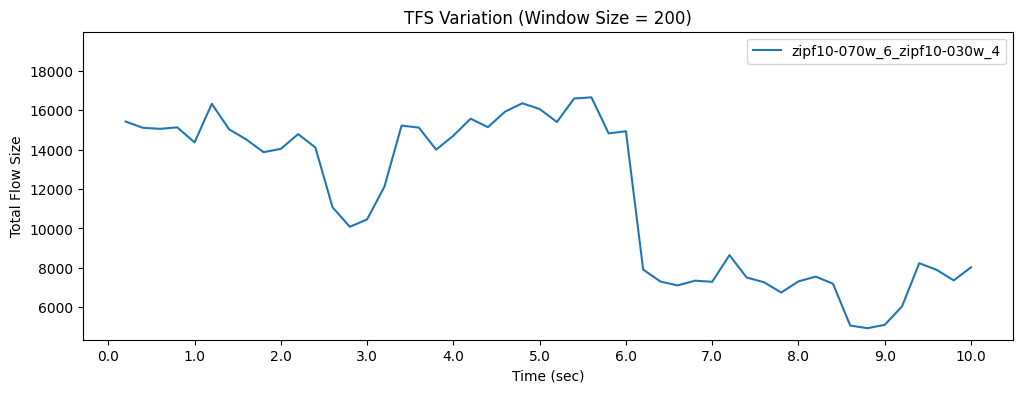

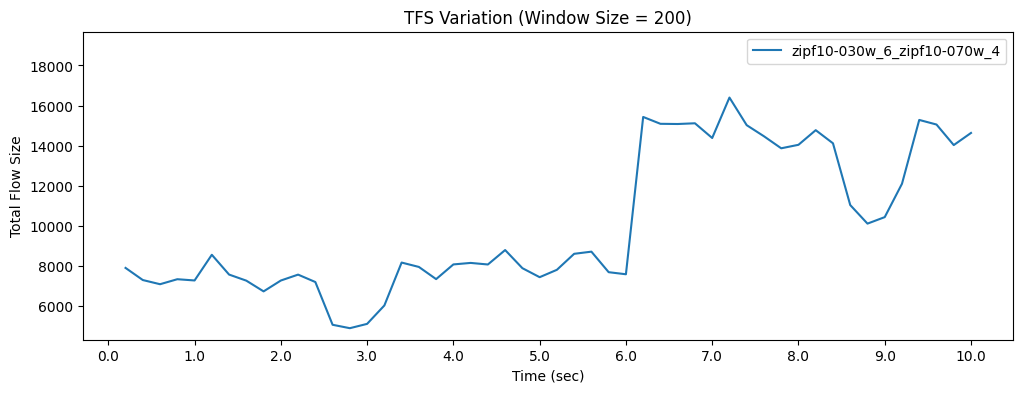

In [67]:
# plot_multi_tfs_var(datasets=pcap_file[:5])
# plot_multi_tfs_var(datasets=pcap_file[5:8])
# plot_multi_tfs_var(datasets=pcap_file[8:10])

# for i in range(10, 23, 3):
#     plot_multi_tfs_var(datasets=pcap_file[i:i+3])
    
# for i in range(40, 50, 2):
#     plot_multi_tfs_var(datasets=pcap_file[i:i+2])

# for i in range(60, 66, 2):
#     plot_multi_tfs_var(datasets=pcap_file[i:i+2])
    
# for i in range(72, 92, 4):
#     plot_multi_tfs_var(datasets=pcap_file[i:i+4])
    
# for i in range(92, 98, 2):
#     plot_multi_tfs_var(datasets=pcap_file[i:i+2])

for i in range(98, 100, 1):
    plot_multi_tfs_var(datasets=pcap_file[i:i+1])


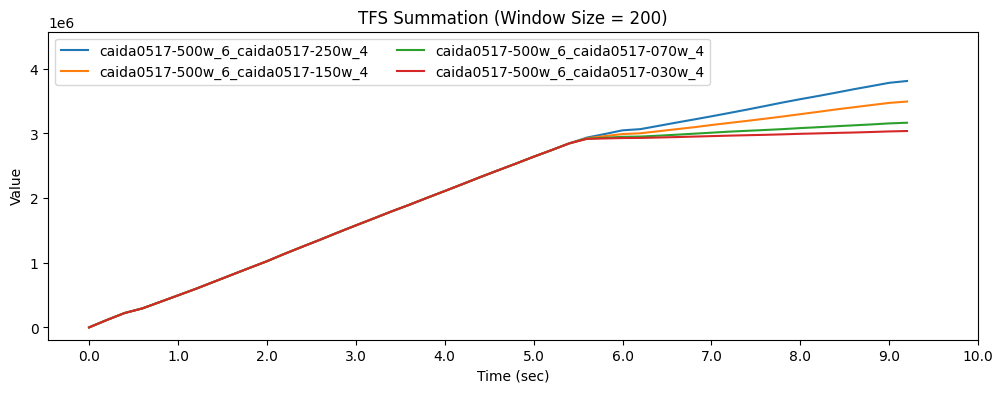

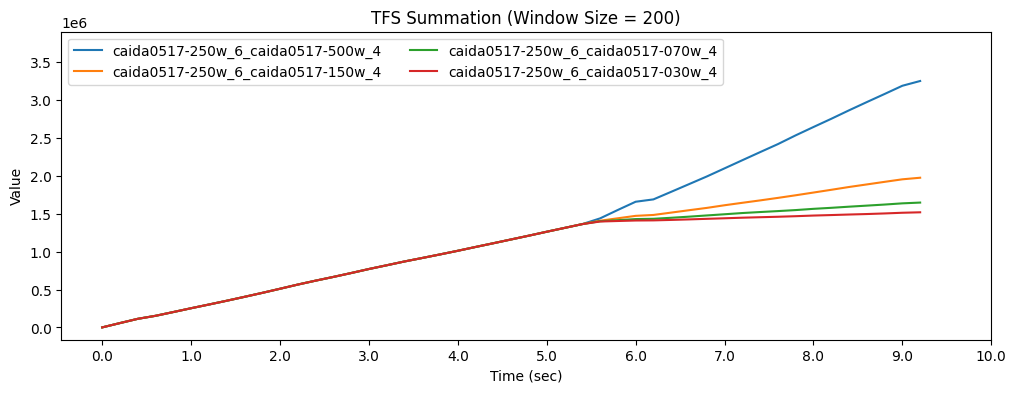

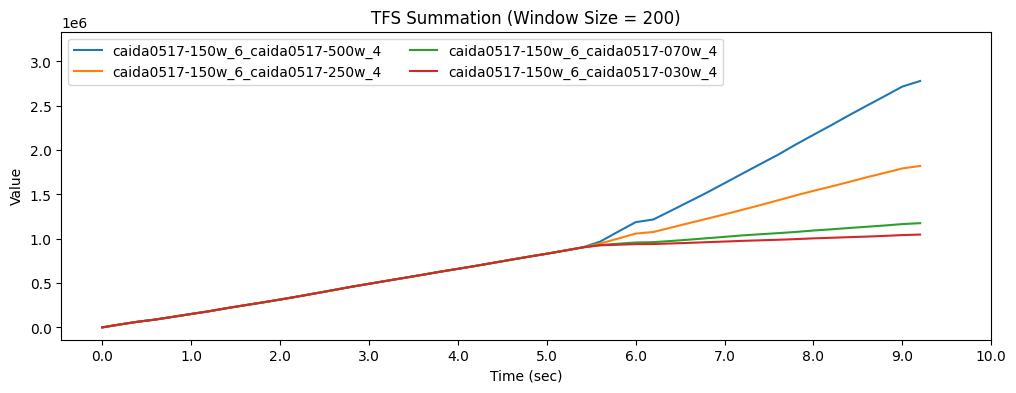

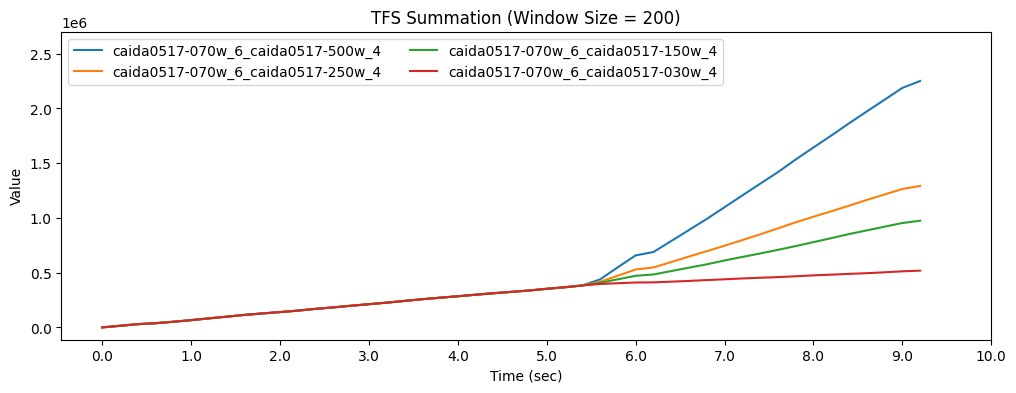

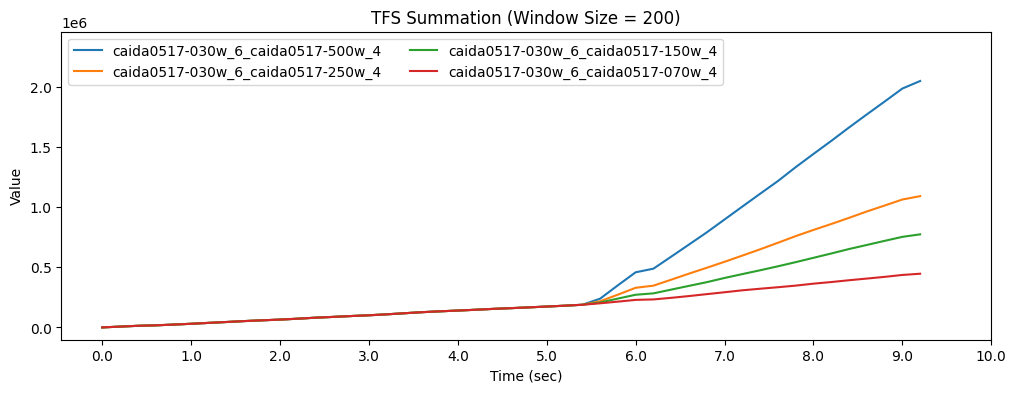

In [73]:
# plot_multi_tfs_sum(datasets=pcap_file[:5])
# plot_multi_tfs_sum(datasets=pcap_file[5:8])
# plot_multi_tfs_sum(datasets=pcap_file[8:10])

# for i in range(10, 23, 3):
#     plot_multi_tfs_sum(datasets=pcap_file[i:i+3])
    
# for i in range(40, 50, 2):
#     plot_multi_tfs_sum(datasets=pcap_file[i:i+2])

# for i in range(60, 66, 2):
#     plot_multi_tfs_sum(datasets=pcap_file[i:i+2])
    
for i in range(72, 92, 4):
    plot_multi_tfs_sum(datasets=pcap_file[i:i+4])
    
# for i in range(92, 98, 2):
#     plot_multi_tfs_sum(datasets=pcap_file[i:i+2])

# for i in range(98, 100, 1):
#     plot_multi_tfs_sum(datasets=pcap_file[i:i+1])